### Stock_price_analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#### *csv means select all csv files 

In [5]:

glob.glob(r'D:/Data/individual_stocks_5yr/*csv')

['D:/Data/individual_stocks_5yr\\AAL_data.csv',
 'D:/Data/individual_stocks_5yr\\AAPL_data.csv',
 'D:/Data/individual_stocks_5yr\\AAP_data.csv',
 'D:/Data/individual_stocks_5yr\\ABBV_data.csv',
 'D:/Data/individual_stocks_5yr\\ABC_data.csv',
 'D:/Data/individual_stocks_5yr\\ABT_data.csv',
 'D:/Data/individual_stocks_5yr\\ACN_data.csv',
 'D:/Data/individual_stocks_5yr\\ADBE_data.csv',
 'D:/Data/individual_stocks_5yr\\ADI_data.csv',
 'D:/Data/individual_stocks_5yr\\ADM_data.csv',
 'D:/Data/individual_stocks_5yr\\ADP_data.csv',
 'D:/Data/individual_stocks_5yr\\ADSK_data.csv',
 'D:/Data/individual_stocks_5yr\\ADS_data.csv',
 'D:/Data/individual_stocks_5yr\\AEE_data.csv',
 'D:/Data/individual_stocks_5yr\\AEP_data.csv',
 'D:/Data/individual_stocks_5yr\\AES_data.csv',
 'D:/Data/individual_stocks_5yr\\AET_data.csv',
 'D:/Data/individual_stocks_5yr\\AFL_data.csv',
 'D:/Data/individual_stocks_5yr\\AGN_data.csv',
 'D:/Data/individual_stocks_5yr\\AIG_data.csv',
 'D:/Data/individual_stocks_5yr\\AIV

In [6]:
# glob.glob(r'/Data/individual_stocks_5yr/*csv')

In [7]:
len(glob.glob(r'D:/Data/individual_stocks_5yr/*csv'))

505

In [8]:
company_list = [
    r'D:/Data/individual_stocks_5yr\\AAPL_data.csv',
    r'D:/Data/individual_stocks_5yr\\AME_data.csv',
    r'D:/Data/individual_stocks_5yr\\GOOGL_data.csv',
    r'D:/Data/individual_stocks_5yr\\MSFT_data.csv'
    
    
]

In [9]:
company_list

['D:/Data/individual_stocks_5yr\\\\AAPL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\AME_data.csv',
 'D:/Data/individual_stocks_5yr\\\\GOOGL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\MSFT_data.csv']

In [10]:
# this for ignore the warning 
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### extract all data from company_list

In [11]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data=pd.concat([all_data,current_df], ignore_index=True)

In [12]:
all_data.shape

(5036, 7)

In [13]:
all_data.head(7)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL


In [14]:
all_data['Name'].unique()

array(['AAPL', 'AME', 'GOOGL', 'MSFT'], dtype=object)

## Analysing change in price of the stock overtime !

In [15]:
# check null value 
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
pd.to_datetime(all_data['date'])

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [18]:
all_data['date']=pd.to_datetime(all_data['date'])

In [19]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [20]:
tech_list=all_data['Name'].unique()

In [21]:
tech_list

array(['AAPL', 'AME', 'GOOGL', 'MSFT'], dtype=object)

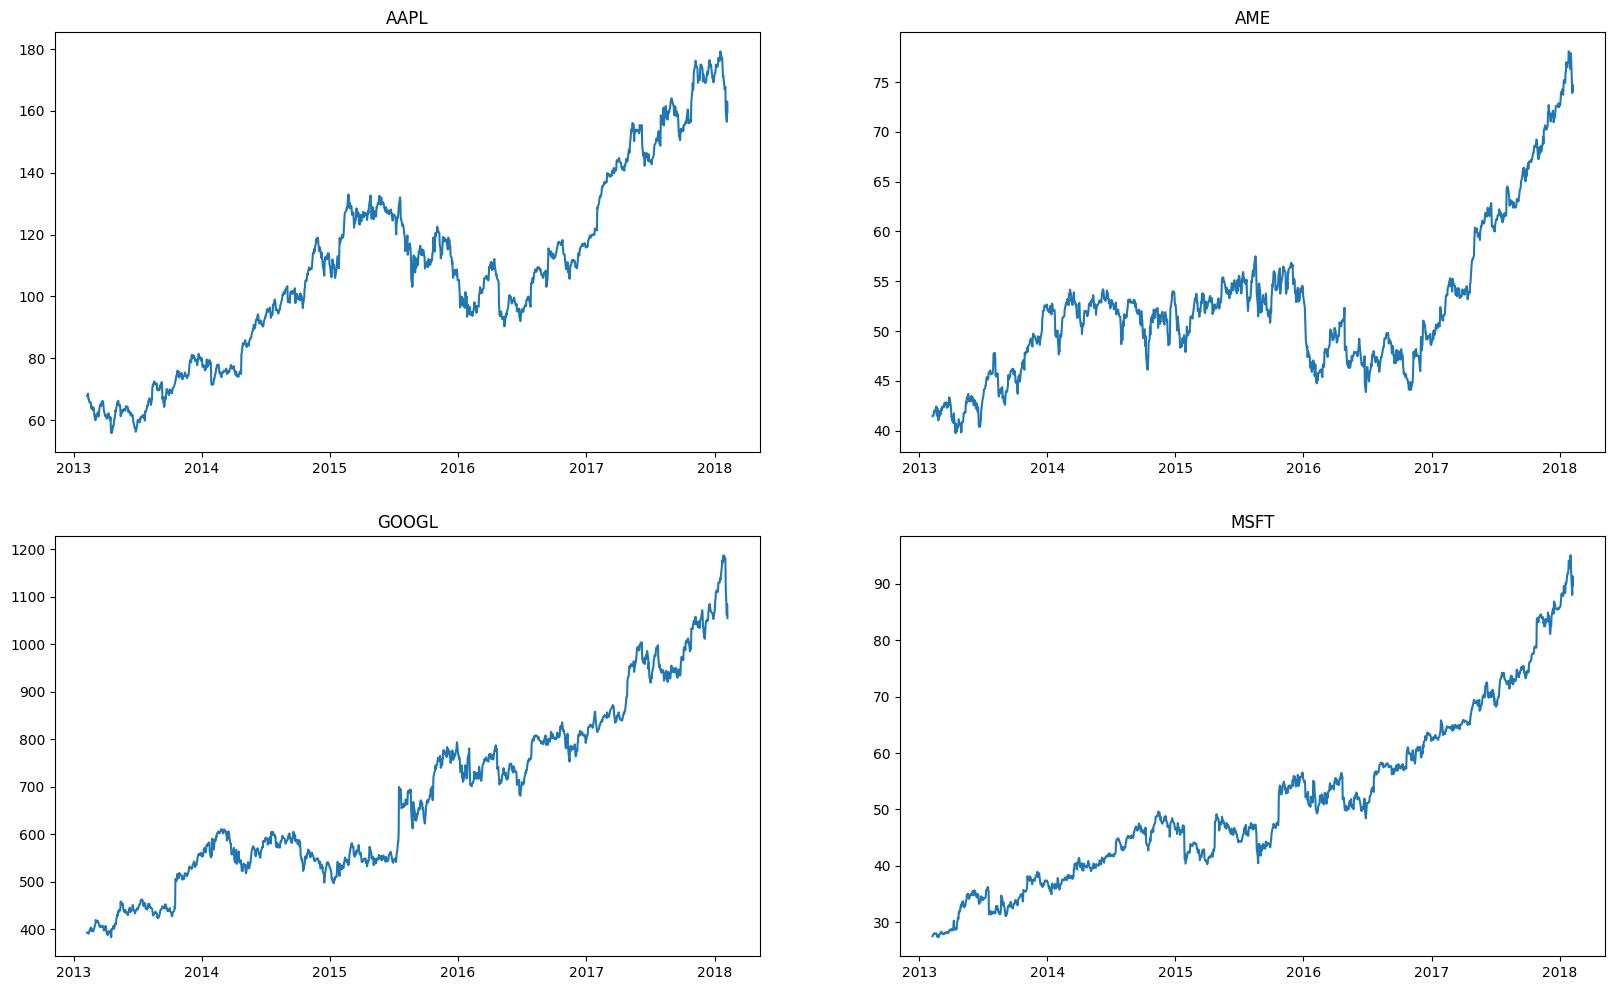

In [22]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

#### what was the moving average of the various stocks

In [23]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [24]:
all_data['close']

0       67.8542
1       68.5614
2       66.8428
3       66.7156
4       66.6556
         ...   
5031    94.2600
5032    91.7800
5033    88.0000
5034    91.3300
5035    89.6100
Name: close, Length: 5036, dtype: float64

In [25]:
all_data['close'].rolling(window=10)

Rolling [window=10,center=False,axis=0,method=single]

In [26]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [27]:
new_data = all_data.copy()

In [28]:
na_day=[10,30,40]

for na in na_day:
    new_data['close_'+str(na)] = new_data['close'].rolling(na).mean()

In [29]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_30,close_40
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5031,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,89.019000,87.89175
5032,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,89.217333,88.14650
5033,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,89.300000,88.27700
5034,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,89.494333,88.49800


In [30]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_30,close_40
5029,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,88.484333,87.29350
5030,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,88.756333,87.56225
5031,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,89.019000,87.89175
5032,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,89.217333,88.14650
5033,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,89.300000,88.27700
5034,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,89.494333,88.49800
5035,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,89.631000,88.63425


## 4.. analyse Closing price change in apple stock !
##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [31]:
company_list

['D:/Data/individual_stocks_5yr\\\\AAPL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\AME_data.csv',
 'D:/Data/individual_stocks_5yr\\\\GOOGL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\MSFT_data.csv']

In [32]:
google = pd.read_csv(r'D:/Data/individual_stocks_5yr\\\\GOOGL_data.csv')

In [33]:
google.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL


In [34]:
google['close']

0        393.0777
1        391.6012
2        390.7403
3        391.8214
4        394.3039
          ...    
1254    1181.5900
1255    1119.2000
1256    1062.3900
1257    1084.4300
1258    1055.4100
Name: close, Length: 1259, dtype: float64

In [35]:
google.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL


In [36]:
google['Daily return(in %)'] = google['close'].pct_change() * 100

### pct_change() returns : Percentage change between the current and a prior element.

In [37]:
google.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,NaN
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,-0.375625
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,-0.219841
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,0.276680


In [38]:
import plotly.express as px

In [39]:
px.line(google , x="date" , y="Daily return(in %)") ## Plotting Line-plot of "date" vs "Daily return(in %)"..

## 5.. Performing resampling analysis of closing price ..


    Before doing resampling,first u have to make your date feature 'row-index' so that u can resample data on various basis :
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [40]:
google.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [41]:
google['date'] =pd.to_datetime(google['date'])

In [42]:
google.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [43]:
google.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,NaN
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,-0.375625
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,-0.219841
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,0.276680


In [44]:
google.set_index('date' , inplace=True)

In [45]:
google.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,NaN
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,-0.375625
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,-0.219841
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,0.276680


In [46]:
google['close'].resample('M').mean() ## resample data on monthly basis ..

date
2013-02-28     396.413514
2013-03-31     409.400805
2013-04-30     398.601241
2013-05-31     438.757368
2013-06-30     439.067380
                 ...     
2017-10-31     999.145000
2017-11-30    1046.983333
2017-12-31    1053.917500
2018-01-31    1139.394286
2018-02-28    1100.604000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

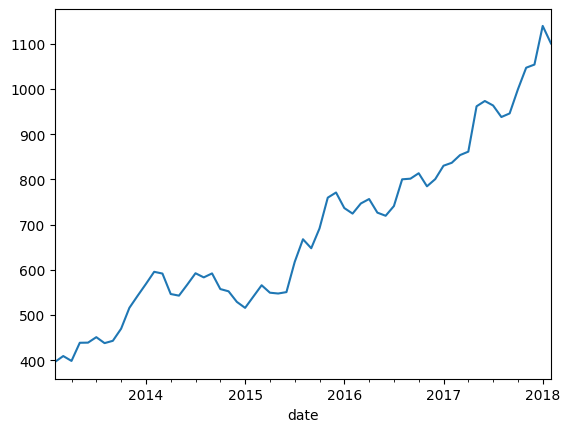

In [47]:
google['close'].resample('M').mean().plot()

In [48]:
google['close'].resample('Y').mean() ## resample data on Yearly basis ..

date
2013-12-31     450.819396
2014-12-31     568.122203
2015-12-31     619.988234
2016-12-31     763.214206
2017-12-31     939.773386
2018-12-31    1131.934615
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

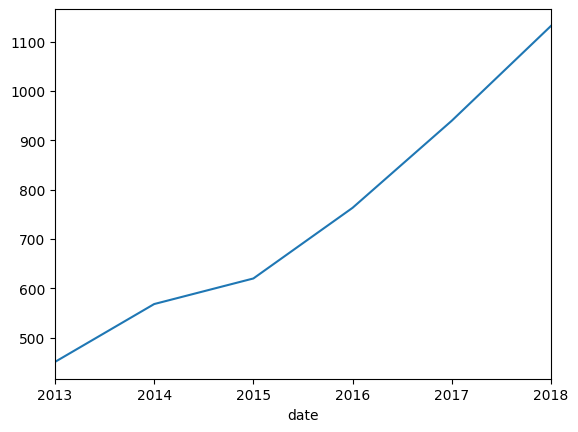

In [49]:
google['close'].resample('Y').mean().plot() 

In [50]:
google['close'].resample('Q').mean() ## resample data on Quarterly basis ..

date
2013-03-31     404.053097
2013-06-30     425.050578
2013-09-30     444.100484
2013-12-31     508.151722
2014-03-31     585.080985
2014-06-30     552.274206
2014-09-30     589.367031
2014-12-31     546.313906
2015-03-31     541.776475
2015-06-30     549.368254
2015-09-30     643.884219
2015-12-31     740.154375
2016-03-31     736.288525
2016-06-30     734.012031
2016-09-30     782.192969
2016-12-31     799.670794
2017-03-31     840.975726
2017-06-30     935.504365
2017-09-30     948.566032
2017-12-31    1032.479206
2018-03-31    1131.934615
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

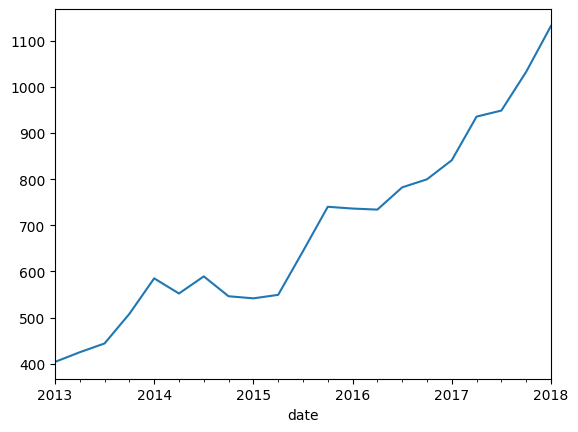

In [51]:
google['close'].resample('Q').mean().plot() ## resample data on Quarterly basis ..

#### Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !

In [52]:
company_list

['D:/Data/individual_stocks_5yr\\\\AAPL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\AME_data.csv',
 'D:/Data/individual_stocks_5yr\\\\GOOGL_data.csv',
 'D:/Data/individual_stocks_5yr\\\\MSFT_data.csv']

In [53]:
company_list[0]

'D:/Data/individual_stocks_5yr\\\\AAPL_data.csv'

In [54]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [55]:
closing_price = pd.DataFrame()

In [56]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [57]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,41.46,393.0777,27.55
1,68.5614,41.51,391.6012,27.86
2,66.8428,41.82,390.7403,27.88
3,66.7156,42.00,391.8214,28.03
4,66.6556,41.91,394.3039,28.04
...,...,...,...,...
1254,167.7800,77.91,1181.5900,94.26
1255,160.5000,77.25,1119.2000,91.78
1256,156.4900,73.90,1062.3900,88.00
1257,163.0300,74.71,1084.4300,91.33


In [58]:
'''
    Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

'''


# Dis-advantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.



# NOTE: the diagnol elements are (histogram) for each feature.

'\n    Pair-plot is all about , we can considering some pairs & \n    we are trying to plot scatterplot of it..\n    \n    Unique plots : 4c2 = 6 unique plots\n    \n    Total plots : 15 ( 6 unique + 6 mirror images of these \n    unique one + 3 diagonal plots(histogram))\n\n'

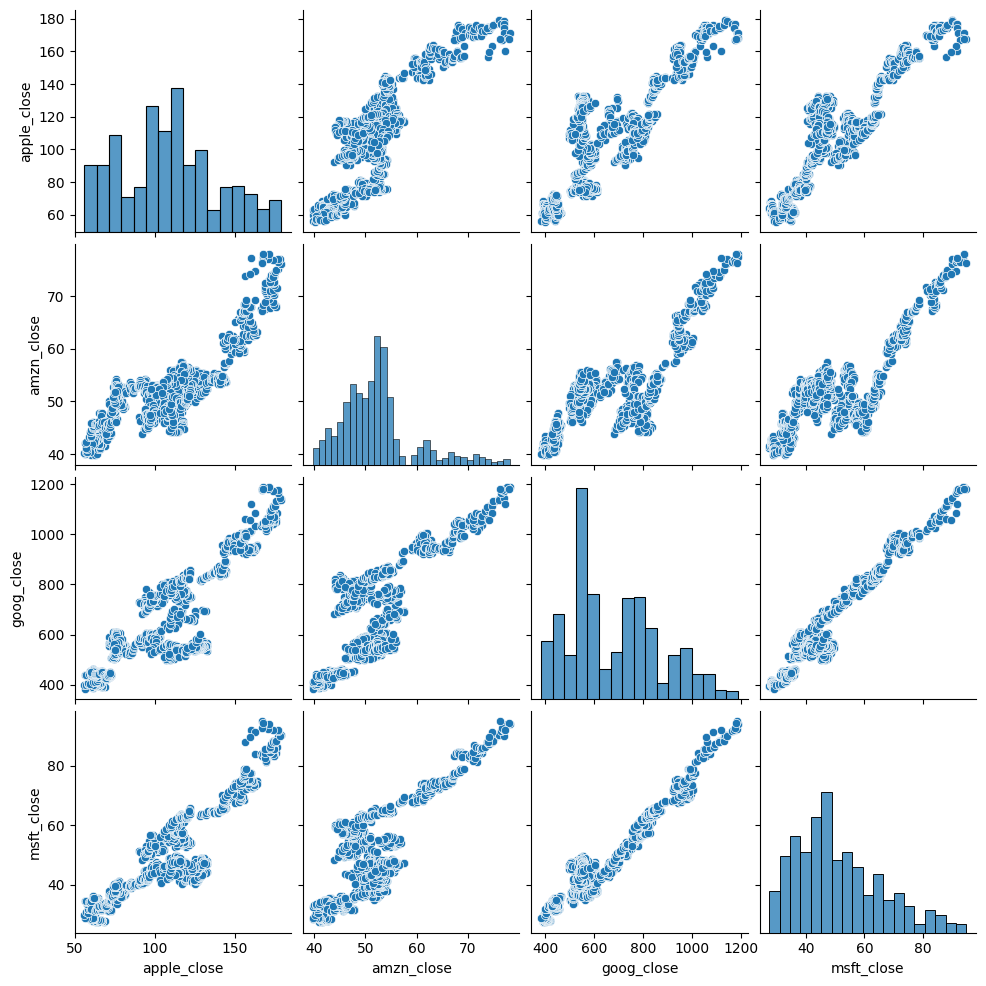

In [59]:
sns.pairplot(closing_price)

In [60]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.849978,0.843736,0.899689
amzn_close,0.849978,1.000000,0.764461,0.803525
goog_close,0.843736,0.764461,1.000000,0.970779
msft_close,0.899689,0.803525,0.970779,1.000000


#### co-relation plot for stock prices

<Axes: >

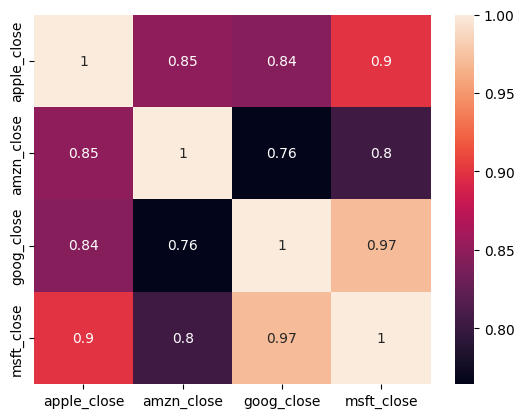

In [61]:
sns.heatmap(closing_price.corr() , annot=True)